In [6]:
import sys, os
sys.path.append('../')

import logging
import numpy as np
import matplotlib.pyplot as plt

from simulation.lensing_sim import LensingSim
from simulation.units import *

logging.basicConfig(
    format='%(asctime)-5.5s %(name)-20.20s %(levelname)-7.7s %(message)s',
    datefmt='%H:%M',
    level=logging.INFO
)

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:
# HST
# SLACS
# LSST
# DES
# EUCLID

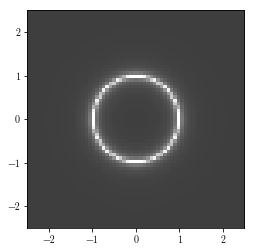

In [38]:
coordinate_limit = 2.5
# exposure = (1 / 1.8e-19) * erg ** -1 * Centimeter ** 2 * Angstrom * 1000 * Sec
exposure = 6.1e18 * erg ** -1 * Centimeter ** 2 * Angstrom * 1000 * Sec

A_iso = 2e-7 * erg / Centimeter ** 2 / Sec / Angstrom / (radtoasc) ** 2
zs = 1.0
zl = 0.1
src_profile="Sersic"
src_I_gal=1e-18 * erg / Centimeter ** 2 / Sec / Angstrom
src_theta_e_gal=0.5
src_n=4

hst_param_dict = {
            "profile": "SIS",
            "theta_x": 0.0,
            "theta_y": 0.0,
            "theta_E": 1,
            "q": 1.,
}

observation_dict = {
            "nx": 64,
            "ny": 64,
            "xlims": (-coordinate_limit, coordinate_limit),
            "ylims": (-coordinate_limit, coordinate_limit),
            "exposure": exposure,
            "A_iso": A_iso,
        }

src_param_dict = {
            "profile": src_profile,
            "I_gal": src_I_gal,
            "theta_e_gal": src_theta_e_gal,
            "n_srsc": src_n,
        }

global_dict = {"z_s": zs, "z_l": zl}

lsi = LensingSim([hst_param_dict], 
                 [src_param_dict], 
                 global_dict, 
                 observation_dict)

image = lsi.lensed_image()

v_min = 2
v_max =3

plt.imshow(np.log10(image),
        vmin=v_min,
        vmax=v_max,
        cmap='gist_gray',
        extent=(-coordinate_limit, coordinate_limit,-coordinate_limit, coordinate_limit),
        origin="lower"
)

In [31]:
lsi.pixarea

0.006103515625